<a href="https://colab.research.google.com/github/khansartz/Bank-transaction-cluster/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Khansa_Maritza_Ar_Rahmah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import numpy as np
import warnings
import os
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# 1. Memahami Struktur Data
print("Jumlah baris dan kolom:", df.shape)

print("\nInformasi umum pada dataset:")
df.info()

Jumlah baris dan kolom: (2512, 16)

Informasi umum pada dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts

In [6]:
print("\nJenis data pada dataset:")
df.dtypes


Jenis data pada dataset:


,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


In [7]:
# 2. Cek missing values pada dataset
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

print("\nMissing values per fitur:")
print(missing_values)


Missing values per fitur:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


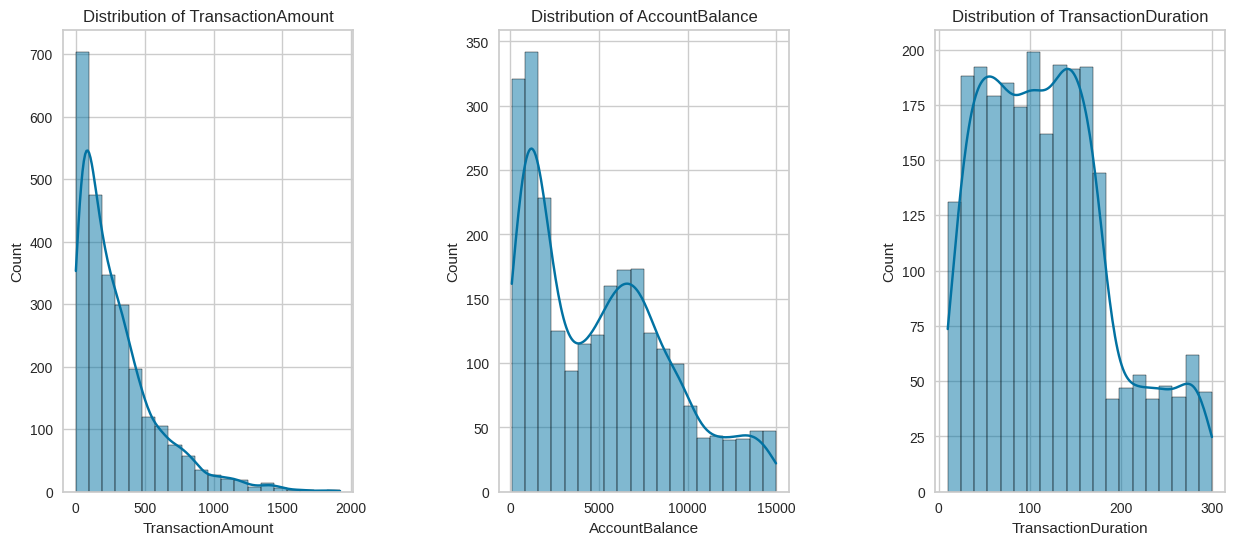

In [8]:
# 3. Analisis Distribusi dan Korelasi
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['TransactionAmount', 'AccountBalance', 'TransactionDuration']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)  # Bisa pakai histplot buat dataset besar
    plt.title(f'Distribution of {x}')
plt.show()

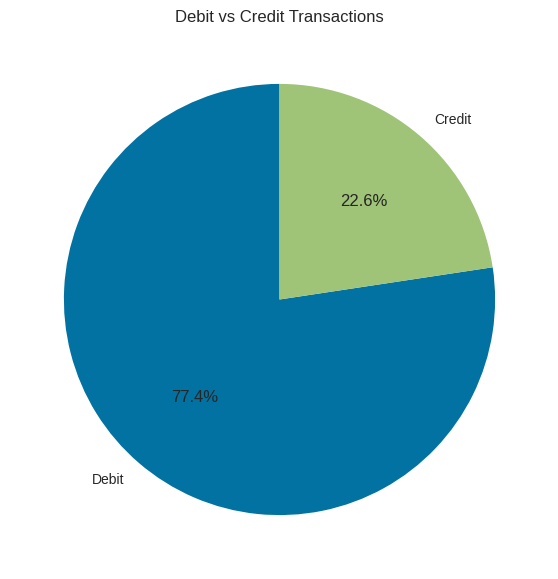

In [9]:
# Menampilkan pie chart untuk visualisasi distribusi tipe transaksi
plt.figure(figsize=(7, 7))
plt.pie(df['TransactionType'].value_counts(), labels=['Debit', 'Credit'], autopct='%1.1f%%', startangle=90)
plt.title('Debit vs Credit Transactions')
plt.show()

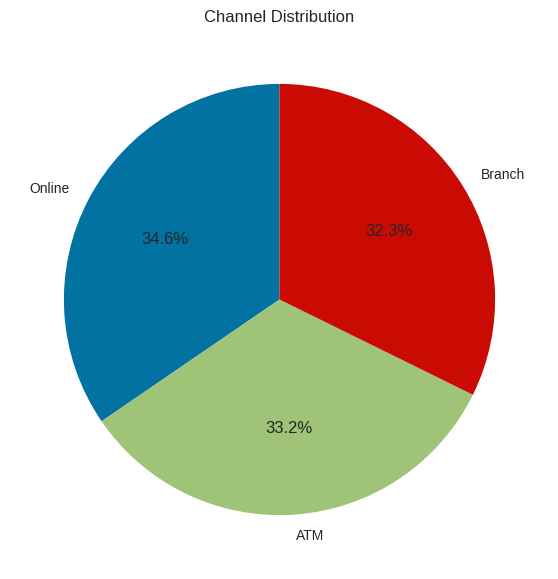

In [10]:
# Menampilkan pie chart untuk visualisasi distribusi tipe transaksi
plt.figure(figsize=(7, 7))
plt.pie(df['Channel'].value_counts(), labels=['Online', 'ATM', 'Branch'], autopct='%1.1f%%', startangle=90)
plt.title('Channel Distribution')
plt.show()

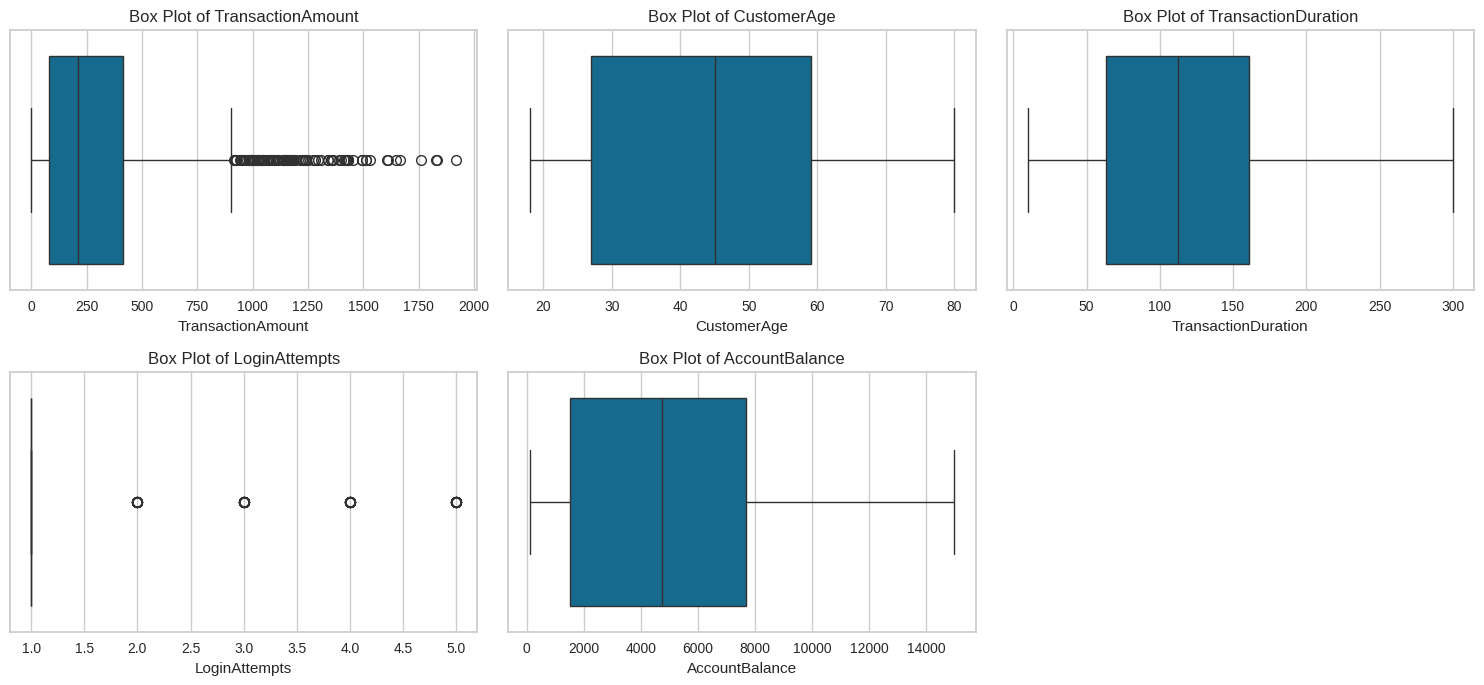

In [11]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


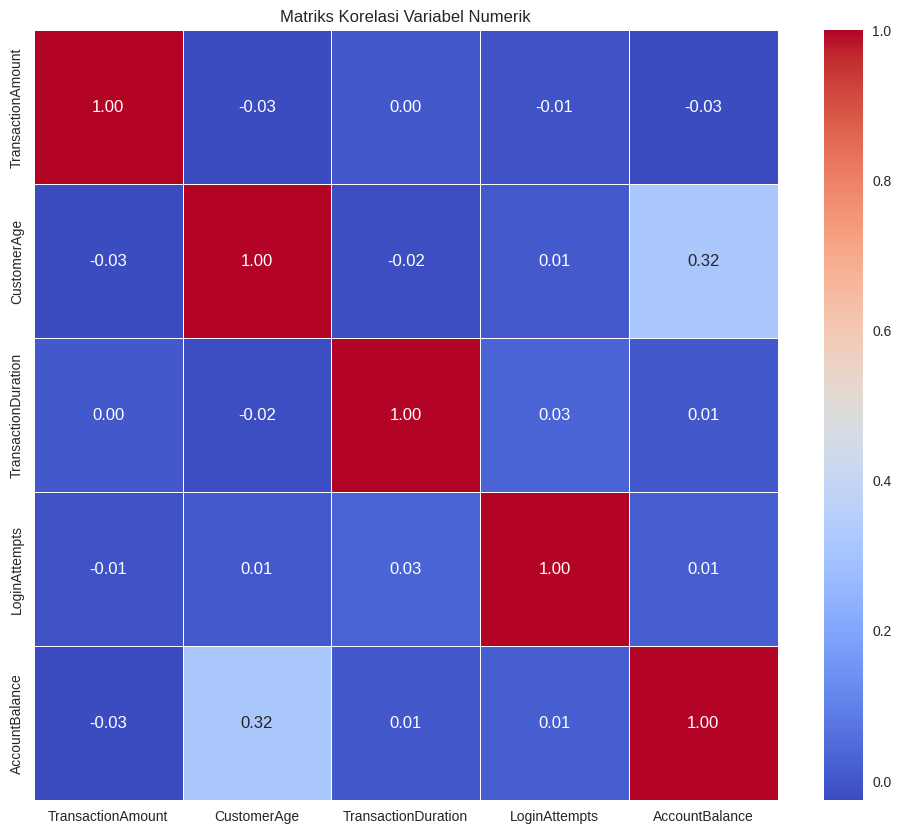

In [12]:
# Matriks korelasi untuk fitur numerik
num_features = df.select_dtypes(include=['int64', 'float64'])  # Pilih fitur numerik

plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

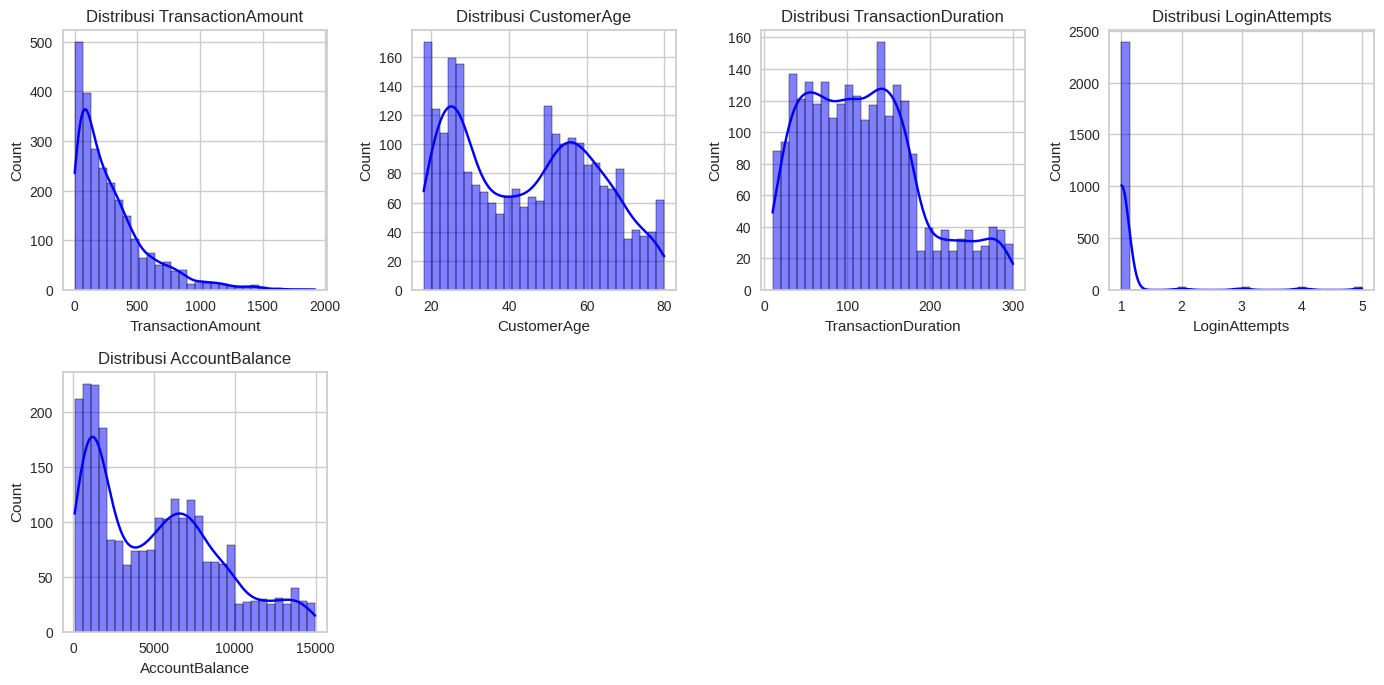

In [13]:
# 4. Visualisasi Data

# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

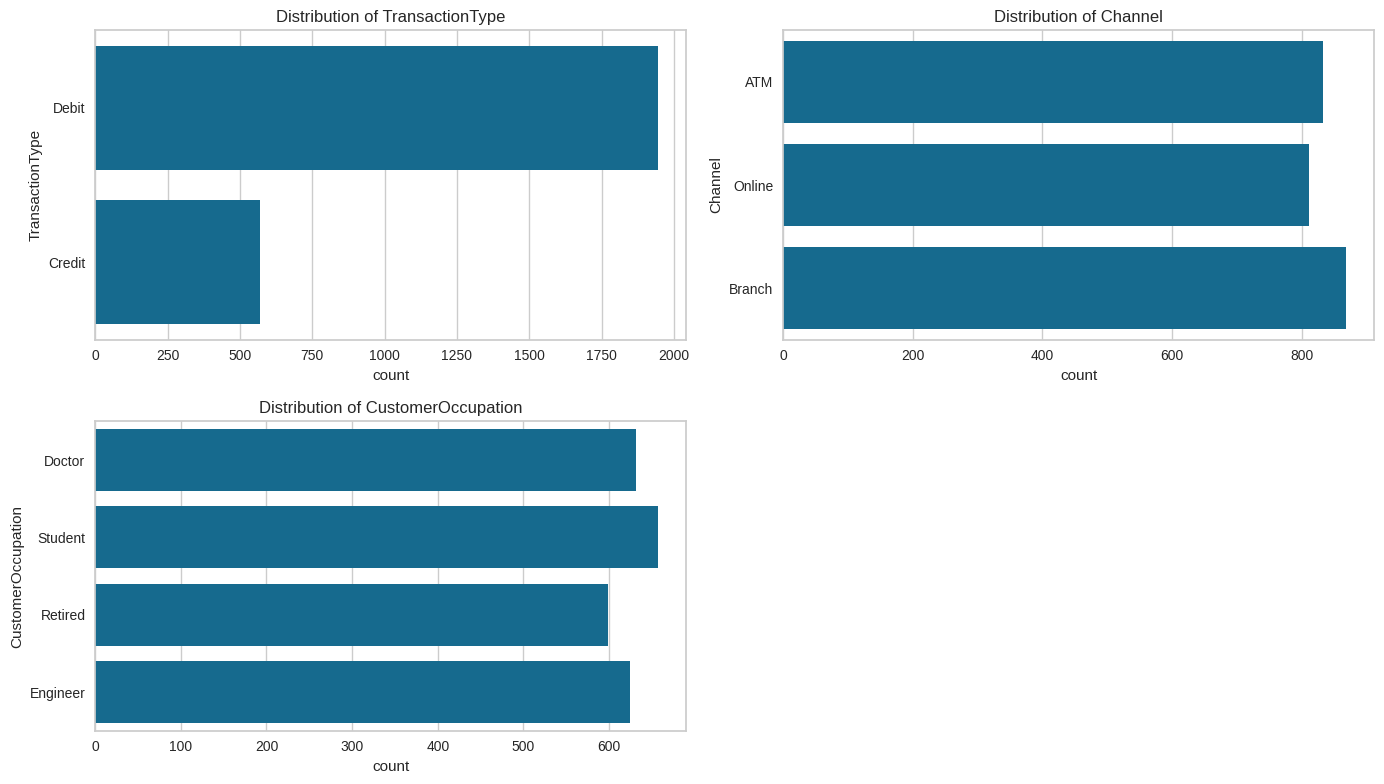

In [14]:
selected_features = ['TransactionType', 'Channel', 'CustomerOccupation']

plt.figure(figsize=(14, 8))
for i, column in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=df[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


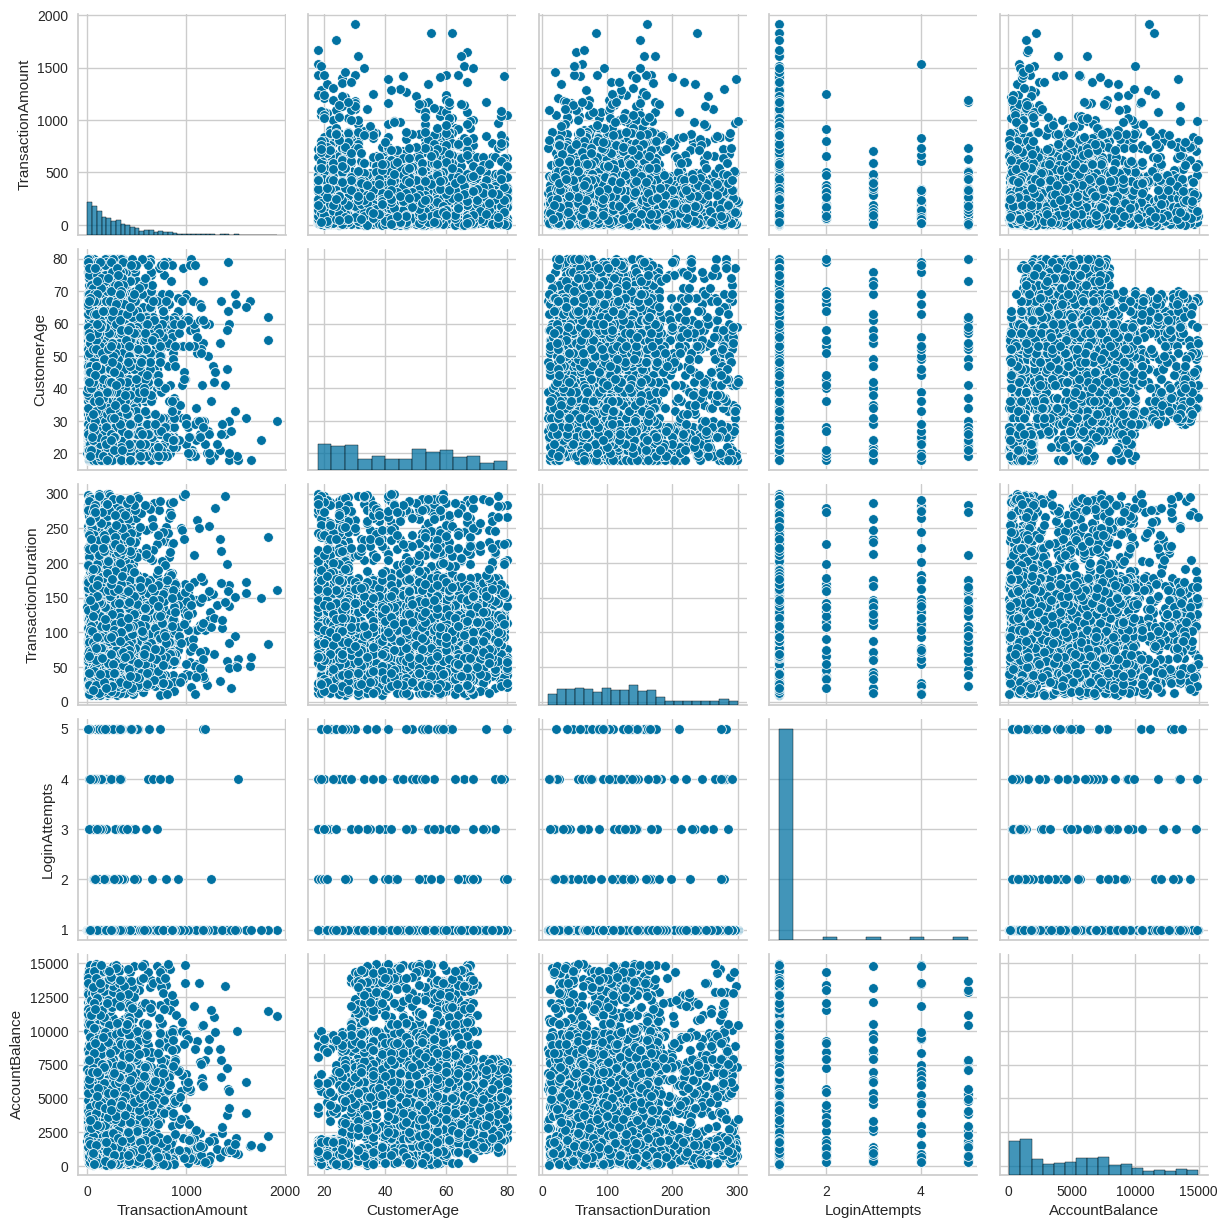

In [15]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

if total_missing == 0:
    print("Tidak ada missing values dalam dataset.")
else:
    df = df.dropna()
    print(f"{total_missing} missing values telah dihapus.")

Tidak ada missing values dalam dataset.


In [17]:
# 2. Menghapus Data Duplikat
num_duplicate = df.duplicated().sum()

if num_duplicate == 0:
    print("Tidak ada data duplikat.")
else:
    df = df.drop_duplicate()
    print(f"{num_duplicate} data duplikat telah dihapus.")


Tidak ada data duplikat.


In [18]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


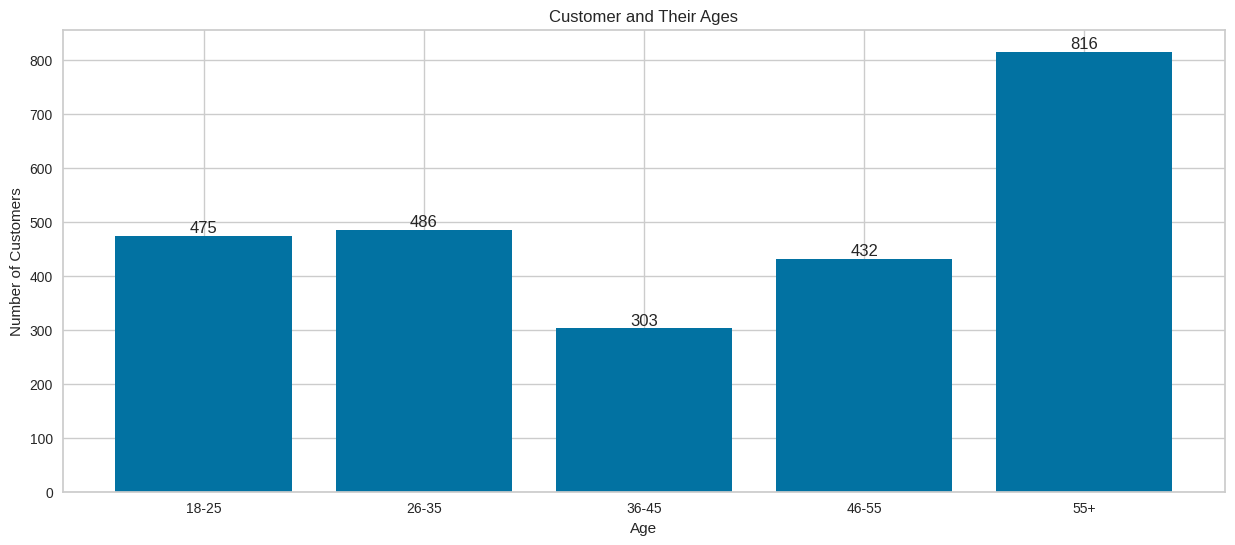

In [19]:
# 3. Binning
# 3.1. Binning Usia Pelanggan

# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 25)]
age26_35 = df.CustomerAge[(df.CustomerAge >= 26) & (df.CustomerAge <= 35)]
age36_45 = df.CustomerAge[(df.CustomerAge >= 36) & (df.CustomerAge <= 45)]
age46_55 = df.CustomerAge[(df.CustomerAge >= 46) & (df.CustomerAge <= 55)]
age55above = df.CustomerAge[df.CustomerAge >= 56]

# Menyusun data untuk plotting
x_age = ["18-25", "26-35", "36-45", "46-55", "55+"]
y_age = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x_age, y_age)
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x_age)):
  plt.text(i, y_age[i], y_age[i], ha='center', va='bottom')

plt.show()

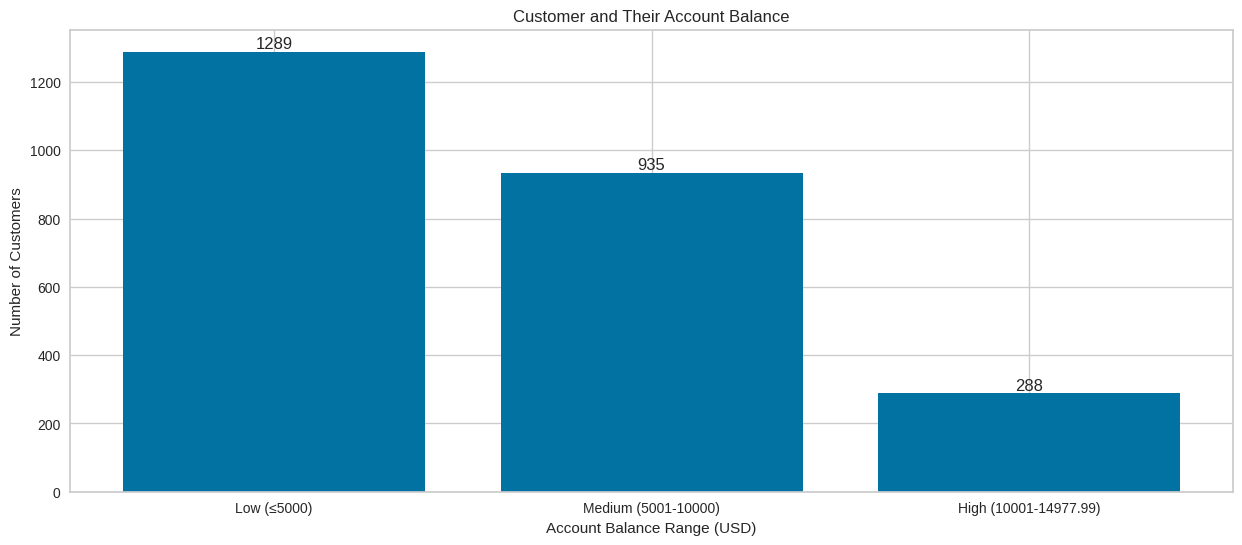

In [20]:
# 3.2. Binning Account Balance

# Mengelompokkan saldo akun ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
balance_low = df.AccountBalance[(df.AccountBalance >= -101.25) & (df.AccountBalance <= 5000)]
balance_medium = df.AccountBalance[(df.AccountBalance > 5000) & (df.AccountBalance <= 10000)]
balance_high = df.AccountBalance[(df.AccountBalance > 10000) & (df.AccountBalance <= 14977.99)]

# Menyusun data untuk plotting
x_balance = ["Low (≤5000)", "Medium (5001-10000)", "High (10001-14977.99)"]
y_balance = [len(balance_low.values), len(balance_medium.values), len(balance_high.values)]

# Membuat bar chart untuk distribusi saldo akun pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x_balance, y_balance)
plt.title("Customer and Their Account Balance")
plt.xlabel("Account Balance Range (USD)")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x_balance)):
    plt.text(i, y_balance[i], y_balance[i], ha='center', va='bottom')

plt.show()

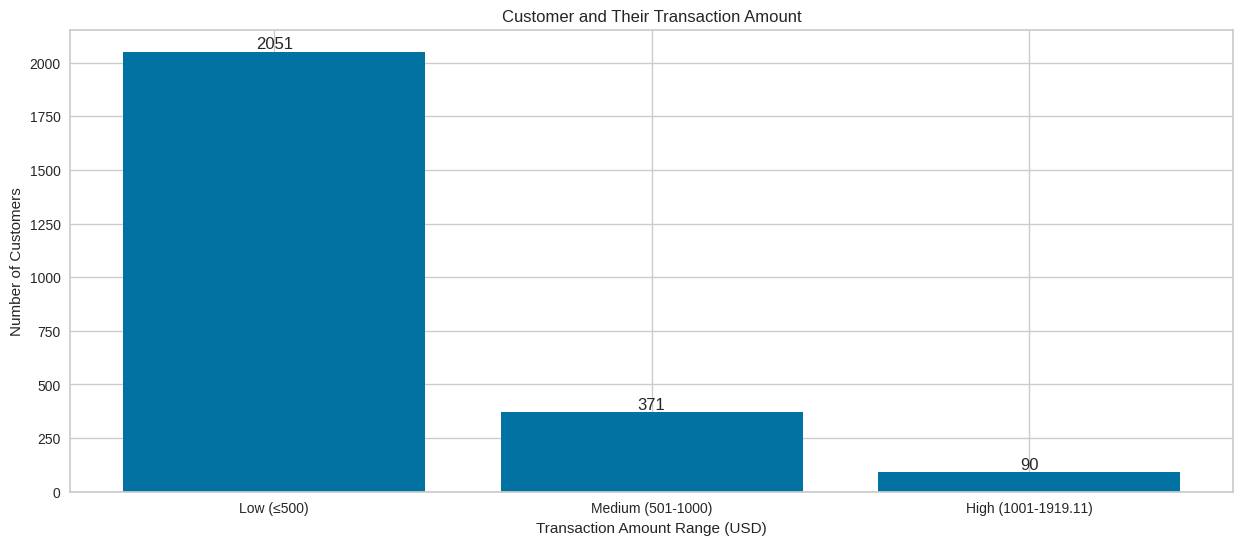

In [21]:
# 3.3. Binning TransactionAmount

# Mengelompokkan jumlah transaksi ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
amount_low = df.TransactionAmount[(df.TransactionAmount >= 0.26) & (df.TransactionAmount <= 500)]
amount_medium = df.TransactionAmount[(df.TransactionAmount > 500) & (df.TransactionAmount <= 1000)]
amount_high = df.TransactionAmount[(df.TransactionAmount > 1000) & (df.TransactionAmount <= 1919.11)]

# Menyusun data untuk plotting
x_amount = ["Low (≤500)", "Medium (501-1000)", "High (1001-1919.11)"]
y_amount = [len(amount_low.values), len(amount_medium.values), len(amount_high.values)]

# Membuat bar chart untuk distribusi jumlah transaksi pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x_amount, y_amount)
plt.title("Customer and Their Transaction Amount")
plt.xlabel("Transaction Amount Range (USD)")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x_amount)):
    plt.text(i, y_amount[i], y_amount[i], ha='center', va='bottom')

plt.show()

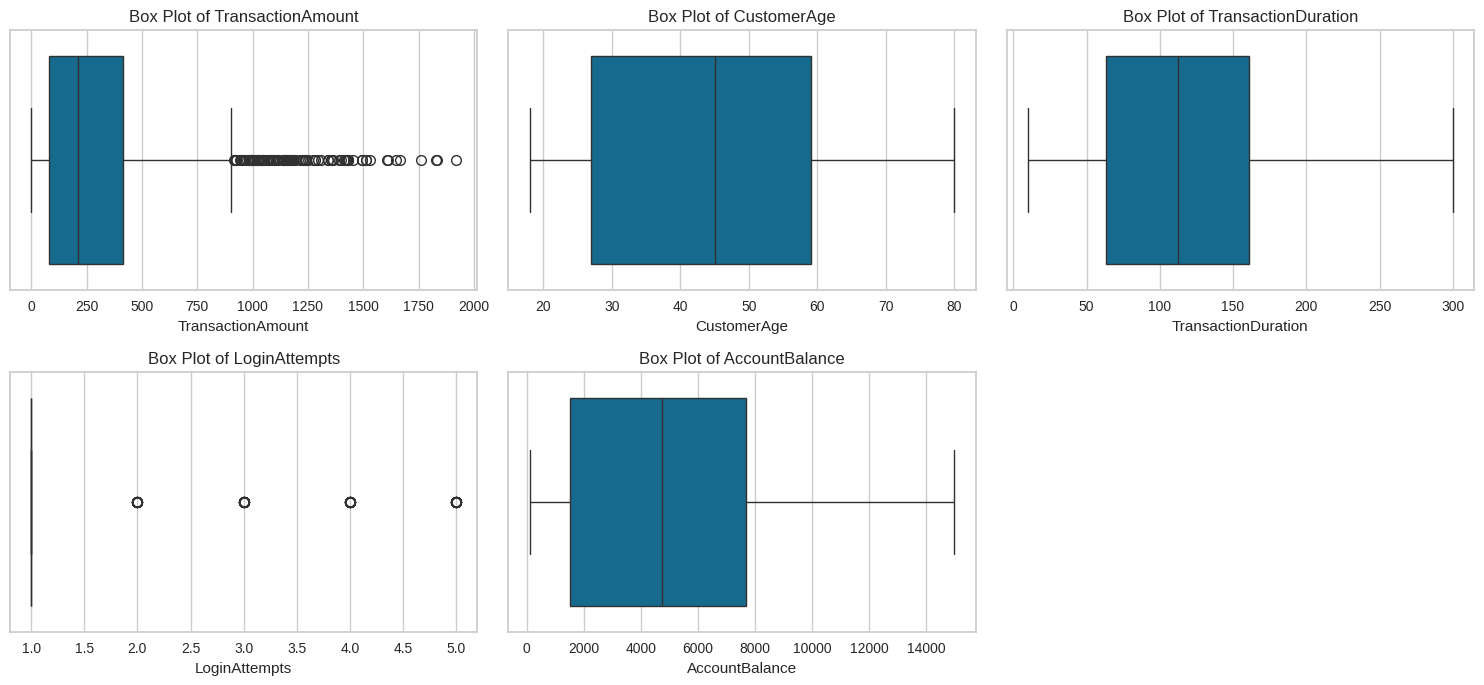

In [22]:
# 4. Deteksi dan Penanganan Outlier
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [23]:
# Menangani outlier

# Memisahkan fitur numerik
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Menghitung IQR untuk masing-masing kolom
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti nilai outlier di masing-masing kolom
for col in numeric_features:
    df[col] = df[col].apply(
        lambda x: lower_bound[col] if x < lower_bound[col]
        else upper_bound[col] if x > upper_bound[col]
        else x
    )

In [24]:
# Ambil ulang kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns

# Buat dataframe akhir yang isinya kolom numerik + kategorikal
df_cleaned = pd.concat([df[numeric_features], df[categorical_features]], axis=1)

print("\nData setelah penanganan outlier:")
print(df_cleaned.describe(include='all'))


Data setelah penanganan outlier:
        TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         2512.000000  2512.000000          2512.000000         2512.0   
unique                NaN          NaN                  NaN            NaN   
top                   NaN          NaN                  NaN            NaN   
freq                  NaN          NaN                  NaN            NaN   
mean           284.847250    44.673965           119.643312            1.0   
std            252.067285    17.792198            69.963757            0.0   
min              0.260000    18.000000            10.000000            1.0   
25%             81.885000    27.000000            63.000000            1.0   
50%            211.140000    45.000000           112.500000            1.0   
75%            414.527500    59.000000           161.000000            1.0   
max            913.491250    80.000000           300.000000            1.0   

        AccountBalance Transa

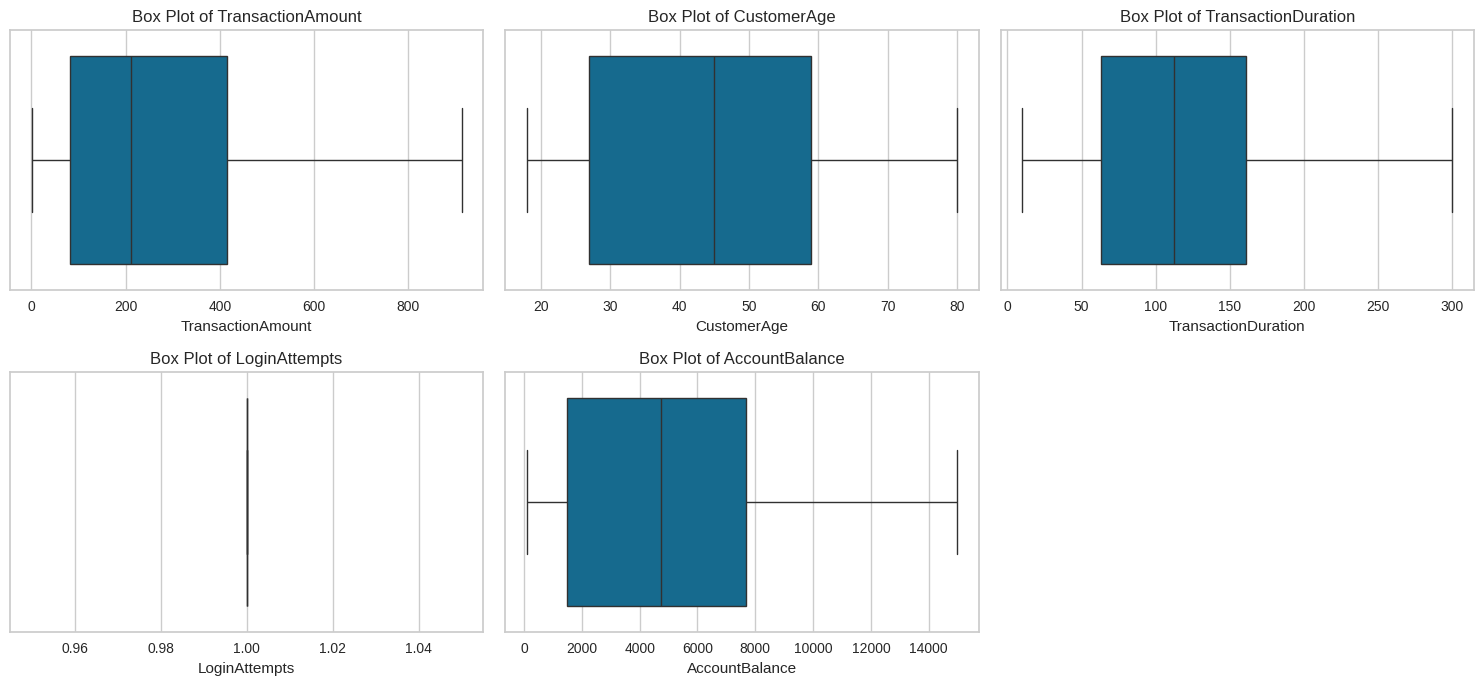

In [25]:
# Visualisasi boxplot setelah penghapusan outlier
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [26]:
# 5. Standardisasi fitur numerik
scaler = StandardScaler()
df_cleaned[numeric_features] = scaler.fit_transform(df_cleaned[numeric_features])

print("\nData setelah StandardScaler:")
print(df_cleaned.head())


Data setelah StandardScaler:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -1.074361     1.423718            -0.552443            0.0   
1           0.362645     1.311287             0.305314            0.0   
2          -0.629153    -1.443277            -0.909842            0.0   
3          -0.398176    -1.049768            -1.353017            0.0   
4          -1.076900    -1.049768             1.120184            0.0   

   AccountBalance TransactionID AccountID      TransactionDate  \
0       -0.000537      TX000001   AC00128  2023-04-11 16:29:14   
1        2.216472      TX000002   AC00455  2023-06-27 16:44:19   
2       -1.023534      TX000003   AC00019  2023-07-10 18:16:08   
3        0.885797      TX000004   AC00070  2023-05-05 16:32:11   
4        0.593589      TX000005   AC00411  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92     

Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

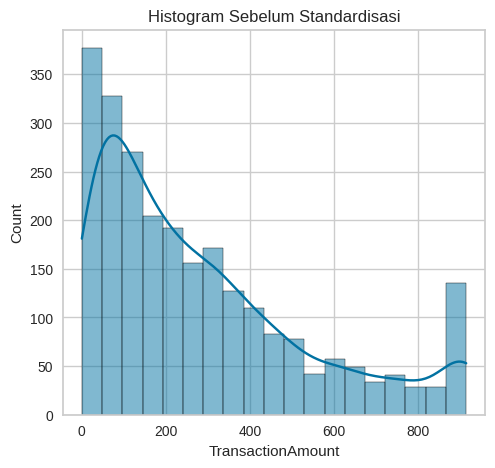

In [27]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_features[0]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

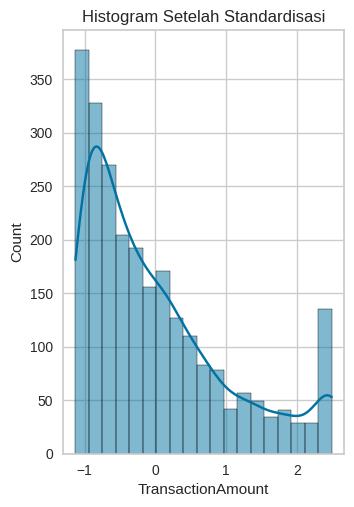

In [28]:
# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned[numeric_features[0]], kde=True)
plt.title("Histogram Setelah Standardisasi")

In [29]:
# 6. Encoding Data Kategorikal
category_features = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[category_features]

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
0,TX000001,AC00128,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,2024-11-04 08:08:08
1,TX000002,AC00455,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,2024-11-04 08:09:35
2,TX000003,AC00019,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,2024-11-04 08:07:04
3,TX000004,AC00070,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,2024-11-04 08:09:06
4,TX000005,AC00411,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor,2024-11-04 08:11:29
2508,TX002509,AC00322,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor,2024-11-04 08:11:42
2509,TX002510,AC00095,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired,2024-11-04 08:08:39
2510,TX002511,AC00118,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,Student,2024-11-04 08:12:22


In [30]:
# List kolom yang akan di-drop
drop_columns = ["TransactionID", "AccountID", "IP Address", "MerchantID", "DeviceID", "TransactionDate", "PreviousTransactionDate", "Location", "LoginAttempts"]

# Drop kolom dari dataframe
df_cleaned.drop(columns=drop_columns, inplace=True, errors='ignore')

# Cek fitur kategorikal yang tersisa
category_features = df_cleaned.select_dtypes(include=['object']).columns
print(category_features)

Index(['TransactionType', 'Channel', 'CustomerOccupation'], dtype='object')


In [31]:
# Ambil fitur kategorikal
category_features = df_cleaned.select_dtypes(include=['object']).columns

# Inisialisasi label encoder per kolom
from sklearn.preprocessing import LabelEncoder

df_lencoder = pd.DataFrame(df_cleaned)
label_encoder_dict = {}

for col in category_features:
    le = LabelEncoder()
    df_lencoder[col] = le.fit_transform(df_cleaned[col])
    label_encoder_dict[col] = le

# Cek mapping agar memudahkan analisis
for col in category_features:
    le = label_encoder_dict[col]
    print(f"\nMapping untuk '{col}':")
    for idx, label in enumerate(le.classes_):
        print(f"  {idx} → {label}")



Mapping untuk 'TransactionType':
  0 → Credit
  1 → Debit

Mapping untuk 'Channel':
  0 → ATM
  1 → Branch
  2 → Online

Mapping untuk 'CustomerOccupation':
  0 → Doctor
  1 → Engineer
  2 → Retired
  3 → Student


In [32]:
print(df_lencoder.head())

   TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0          -1.074361     1.423718            -0.552443       -0.000537   
1           0.362645     1.311287             0.305314        2.216472   
2          -0.629153    -1.443277            -0.909842       -1.023534   
3          -0.398176    -1.049768            -1.353017        0.885797   
4          -1.076900    -1.049768             1.120184        0.593589   

   TransactionType  Channel  CustomerOccupation  
0                1        0                   0  
1                1        0                   0  
2                1        2                   3  
3                1        2                   3  
4                0        2                   3  


In [33]:
# Mengambil df yang sudah di-encode
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

X = df_lencoder.copy()

# Scale ulang kolom numerik yang perlu di standarisasi)
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [34]:
# Memakai PCA sebelum clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

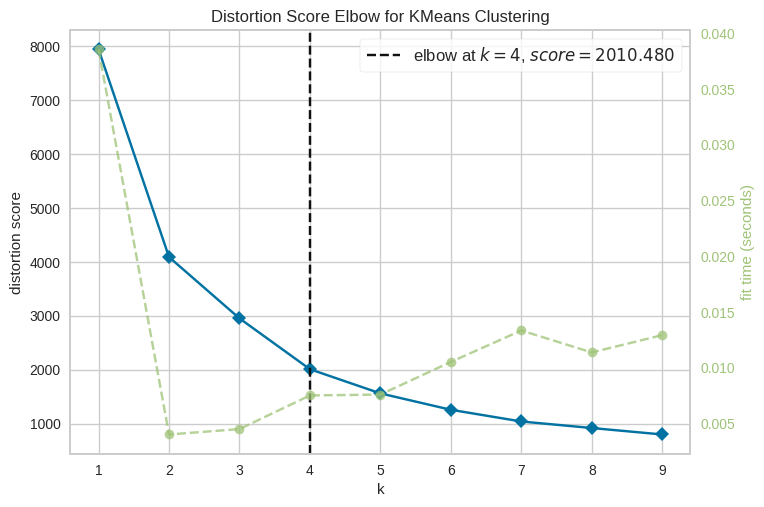

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Inisialisasi model K-Means tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer K-Elbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_pca)

# Menampilkan grafik elbow
visualizer.show()

In [36]:
# Memakai data hasil standardisasi
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Ambil label hasil clustering
labels = kmeans.labels_

# Salin dataframe hasil encode untuk ditambah ke cluster
df_clustered = df_lencoder.copy()
df_clustered['Cluster'] = labels

# Menganalisis karakteristik per cluster
def analyze_clusters(df, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        print(f"\nCluster {cluster_id + 1}:")
        cluster_data = df[df['Cluster'] == cluster_id]

        # Mean semua kolom numerik
        means = cluster_data.mean(numeric_only=True)

        for col, val in means.items():
            if col != "Cluster":
                print(f"Rata-rata {col}: {val:.2f}")

analyze_clusters(df_clustered, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: -0.35
Rata-rata CustomerAge: 0.47
Rata-rata TransactionDuration: -0.56
Rata-rata AccountBalance: -0.11
Rata-rata TransactionType: 0.77
Rata-rata Channel: 1.04
Rata-rata CustomerOccupation: 1.42

Cluster 2:
Rata-rata TransactionAmount: 0.05
Rata-rata CustomerAge: -1.22
Rata-rata TransactionDuration: 0.02
Rata-rata AccountBalance: -0.96
Rata-rata TransactionType: 0.79
Rata-rata Channel: 0.98
Rata-rata CustomerOccupation: 3.00

Cluster 3:
Rata-rata TransactionAmount: -0.16
Rata-rata CustomerAge: 0.40
Rata-rata TransactionDuration: -0.17
Rata-rata AccountBalance: 1.42
Rata-rata TransactionType: 0.75
Rata-rata Channel: 0.95
Rata-rata CustomerOccupation: 0.06

Cluster 4:
Rata-rata TransactionAmount: 0.58
Rata-rata CustomerAge: 0.35
Rata-rata TransactionDuration: 0.93
Rata-rata AccountBalance: 0.08
Rata-rata TransactionType: 0.79
Rata-rata Channel: 0.97
Rata-rata CustomerOccupation: 1.15


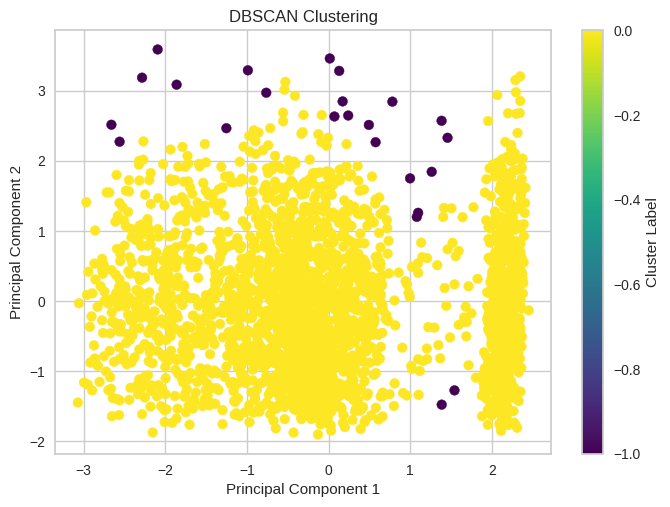

In [37]:
# Membandingkan algoritma K-Means dengan DBSCAN

# Inisialisasi DBSCAN dengan parameter yang sudah ditentukan
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit DBSCAN ke data dan dapatkan labelnya
dbscan_labels = dbscan.fit_predict(X_pca)

# Visualisasi hasil clustering dengan DBSCAN
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [38]:
# Hitung berapa banyak titik noise (label -1)
noise_points = sum(dbscan_labels == -1)
print(f"Jumlah noise points: {noise_points}")


Jumlah noise points: 24


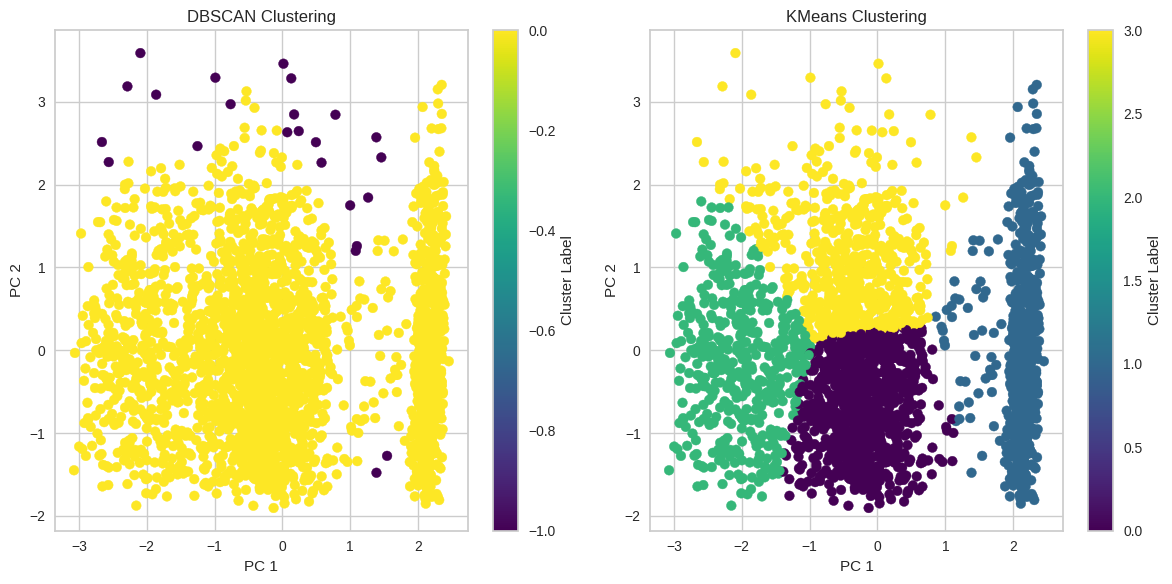

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-Means clustering
kmeans_labels = kmeans.fit_predict(X_pca)

# Visualisasi DBSCAN
plt.figure(figsize=(12, 6))

# DBSCAN Plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Label')

# KMeans Plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

In [40]:
# Jumlah cluster yang ditemukan oleh DBSCAN (tanpa noise)
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Jumlah cluster DBSCAN (tanpa noise): {num_clusters_dbscan}")

# Jumlah cluster KMeans
num_clusters_kmeans = len(set(kmeans_labels))
print(f"Jumlah cluster KMeans: {num_clusters_kmeans}")

Jumlah cluster DBSCAN (tanpa noise): 1
Jumlah cluster KMeans: 4


Cluster dari K-Means yang akan digunakan karena K-Means dapat mengelompokkan data menjadi 4 cluster, sedangkan DBSCAN hanya bisa menemukan 1 cluster.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [41]:
# Menentukan range jumlah cluster yang akan diuji
range_clusters = range(2, 11)
results = []

# Looping untuk mencoba berbagai jumlah cluster
for k_try in range_clusters:
    if k_try == k:
        score = silhouette_score(X_pca, labels)
    else:
        kmeans_temp = KMeans(n_clusters=k_try, random_state=0, n_init=10)
        kmeans_temp.fit(X_pca)
        score = silhouette_score(X_pca, kmeans_temp.labels_)

    results.append((k_try, score))

# Tampilkan hasil Silhouette Score
print("\nJumlah Cluster | Silhouette Score")
print("-" * 30)
for k_try, score in results:
    print(f"{k_try:<14} | {score:.4f}")



Jumlah Cluster | Silhouette Score
------------------------------
2              | 0.4752
3              | 0.3975
4              | 0.4308
5              | 0.4257
6              | 0.4092
7              | 0.4113
8              | 0.4056
9              | 0.4046
10             | 0.3990


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [42]:
silhouette_before = silhouette_score(X_pca, kmeans.labels_)
print("Silhouette Score sebelum feature selection:", silhouette_before)

Silhouette Score sebelum feature selection: 0.4308270315996314


In [43]:
# Pilih 5 fitur terbaik berdasarkan skor
selector = SelectKBest(score_func=f_classif, k=5)

# Transformasi data dengan fitur yang dipilih
X_selected = selector.fit_transform(X, labels)

# Nama fitur terpilih
selected_features = X.columns[selector.get_support()]
print("Fitur terpilih:", list(selected_features))


Fitur terpilih: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'CustomerOccupation']


In [44]:
pca_selected = PCA(n_components=2)

# Transformasi data hasil seleksi fitur ke PCA
X_selected_pca = pca_selected.fit_transform(X_selected)

# Memakai K-Means ke data hasil seleksi fitur
k = 4

kmeans_selected = KMeans(n_clusters=k, random_state=42)
kmeans_selected.fit(X_selected_pca)
labels_selected = kmeans_selected.labels_

# Hitung Silhouette Score setelah seleksi fitur
silhouette_after = silhouette_score(X_selected_pca, labels_selected)
print(f"Silhouette Score setelah feature selection: {silhouette_after:.4f}")


Silhouette Score setelah feature selection: 0.4309


In [45]:
print(f"Silhouette Score sebelum feature selection: {silhouette_before:.4f}")
print(f"Silhouette Score setelah feature selection: {silhouette_after:.4f}")

Silhouette Score sebelum feature selection: 0.4308
Silhouette Score setelah feature selection: 0.4309


Setelah dilakukan feature selection terhadap 5 fitur terbaik, didapatkan bahwa nilai silhouette score tidak mengalami perubahan signifikan (sebelum: 0.4308, sesudah: 0.4309), yang menunjukkan bahwa fitur yang digunakan sebelumnya sudah cukup representatif terhadap struktur cluster data.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

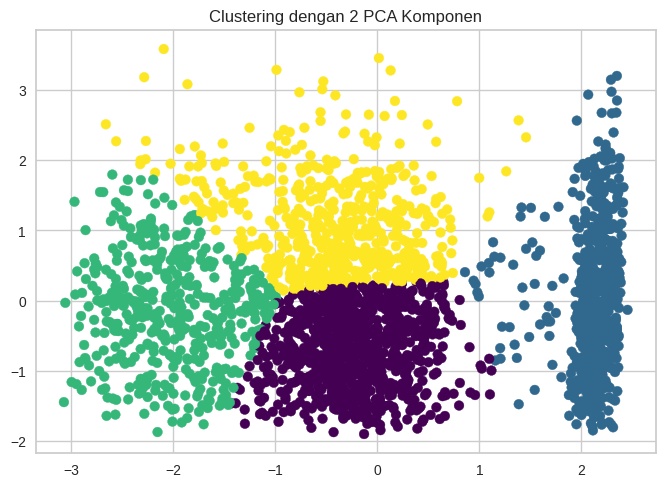

In [46]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering dengan 2 PCA Komponen')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [47]:
df_lencoder['Cluster'] = kmeans.labels_

df_lencoder['TransactionType'] = label_encoder_dict['TransactionType'].inverse_transform(df_lencoder['TransactionType'])
df_lencoder['Channel'] = label_encoder_dict['Channel'].inverse_transform(df_lencoder['Channel'])
df_lencoder['CustomerOccupation'] = label_encoder_dict['CustomerOccupation'].inverse_transform(df_lencoder['CustomerOccupation'])

In [48]:
df['TransactionType'] = df_lencoder['TransactionType']

df['CustomerOccupation'] = df_lencoder['CustomerOccupation']

df['Channel'] = df_lencoder['Channel']

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [49]:
df_lencoder[numeric_features] = scaler.inverse_transform(df_lencoder[numeric_features])

In [50]:
# Masukin label cluster ke dataframe yang udah di-inverse
df_lencoder['Cluster'] = labels

# Memisahkan fitur numerik & kategorikal
numeric_cols = ['CustomerAge', 'TransactionAmount', 'TransactionDuration', 'AccountBalance']
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

# Loop untuk analisis per cluster
for i in range(k):
    print(f"\n ○ Cluster {i + 1}")
    cluster_data = df_lencoder[df_lencoder['Cluster'] == i]

    # Mean fitur numerik
    print("Rata-rata (Mean) fitur numerikal:")
    for col in numeric_cols:
        mean_val = cluster_data[col].mean()
        print(f"- {col}: {mean_val:.2f}")

    # Modus fitur kategorikal
    print("Modus fitur kategorikal:")
    for col in categorical_cols:
        mode_val = cluster_data[col].mode()
        if not mode_val.empty:
            print(f"- {col}: {mode_val.iloc[0]}")
        else:
            print(f"- {col}: (gak ada data)")


 ○ Cluster 1
Rata-rata (Mean) fitur numerikal:
- CustomerAge: 0.47
- TransactionAmount: -0.35
- TransactionDuration: -0.56
- AccountBalance: -0.11
Modus fitur kategorikal:
- TransactionType: Debit
- Channel: Branch
- CustomerOccupation: Retired

 ○ Cluster 2
Rata-rata (Mean) fitur numerikal:
- CustomerAge: -1.22
- TransactionAmount: 0.05
- TransactionDuration: 0.02
- AccountBalance: -0.96
Modus fitur kategorikal:
- TransactionType: Debit
- Channel: Branch
- CustomerOccupation: Student

 ○ Cluster 3
Rata-rata (Mean) fitur numerikal:
- CustomerAge: 0.40
- TransactionAmount: -0.16
- TransactionDuration: -0.17
- AccountBalance: 1.42
Modus fitur kategorikal:
- TransactionType: Debit
- Channel: Branch
- CustomerOccupation: Doctor

 ○ Cluster 4
Rata-rata (Mean) fitur numerikal:
- CustomerAge: 0.35
- TransactionAmount: 0.58
- TransactionDuration: 0.93
- AccountBalance: 0.08
Modus fitur kategorikal:
- TransactionType: Debit
- Channel: ATM
- CustomerOccupation: Engineer


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [51]:
# Hitung rata-rata tiap fitur per cluster
cluster_summary = df_clustered.groupby('Cluster').mean(numeric_only=True)

# Biar hasilnya lebih kece dan kebaca
print(cluster_summary)

         TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
Cluster                                                                        
0                -0.345015     0.470262            -0.559132       -0.105148   
1                 0.046771    -1.217447             0.020894       -0.957888   
2                -0.160892     0.400131            -0.165584        1.419913   
3                 0.584086     0.346973             0.931213        0.080131   

         TransactionType   Channel  CustomerOccupation  
Cluster                                                 
0               0.769048  1.038095            1.423810  
1               0.787167  0.982786            3.000000  
2               0.748373  0.950108            0.056399  
3               0.786713  0.965035            1.145105  


# Analisis Karakteristik Cluster dari Model KMeans
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata CustomerAge:** 0.47
- **Rata-rata TransactionAmount:** -0.35
- **Rata-rata TransactionDuration:** -0.56
- **Rata-rata AccountBalance:** -0.11
- **Modus TransactionType:** Debit
- **Modus Channel:** Branch
- **Modus CustomerOccupation:** Retired
- **Analisis:**
Cluster ini terdiri dari pelanggan pensiunan yang lebih nyaman bertransaksi langsung di cabang bank. Kelompok ini cenderung melakukan transaksi dengan jumlah yang lebih kecil dan waktu transaksi yang lebih singkat. Saldo akun mereka sedikit di bawah rata-rata, yang mungkin menunjukkan bahwa mereka menggunakan dana mereka secara lebih konservatif dan bergantung pada dana pensiun atau tabungan mereka. Bank dapat menargetkan cluster ini dengan layanan keuangan khusus seperti tabungan pensiun, investasi aman, atau layanan konsultasi keuangan bagi lansia.

## Cluster 2:
- **Rata-rata CustomerAge:** -1.22
- **Rata-rata TransactionAmount:** 0.05
- **Rata-rata TransactionDuration:** 0.02
- **Rata-rata AccountBalance:** -0.96
- **Modus TransactionType:** Debit
- **Modus Channel:** Branch
- **Modus CustomerOccupation:** Student
- **Analisis:**
Cluster ini mencakup pelanggan pelajar dengan saldo akun yang sangat rendah, yang menunjukkan keterbatasan dana karena kemungkinan masih mengandalkan uang dari orang tua atau beasiswa. Mereka lebih sering melakukan transaksi di cabang bank, kemungkinan untuk keperluan administrasi seperti pencairan beasiswa atau pembayaran tagihan tertentu. Dengan karakteristik ini, bank bisa menawarkan layanan khusus seperti rekening mahasiswa dengan biaya admin rendah, program tabungan, atau promo transaksi berbasis kartu debit untuk menarik pelanggan di segmen ini.

## Cluster 3:
- **Rata-rata CustomerAge:** 0.40
- **Rata-rata TransactionAmount:** -0.16
- **Rata-rata TransactionDuration:** -0.17
- **Rata-rata AccountBalance:** 1.42
- **Modus TransactionType:** Debit
- **Modus Channel:** Branch
- **Modus CustomerOccupation:** Doctor
- **Analisis:**
Cluster ini didominasi oleh dokter, yang memiliki saldo akun tertinggi dibanding cluster lainnya. Meskipun mereka memiliki dana yang besar, transaksi mereka cenderung lebih kecil dan dilakukan di cabang bank. Hal ini bisa menunjukkan bahwa mereka lebih sering berkunjung untuk layanan keuangan yang lebih kompleks seperti investasi atau asuransi. Untuk meningkatkan layanan kepada pelanggan ini, bank bisa menyediakan layanan keuangan premium atau penawaran eksklusif terkait asuransi.

## Cluster 4:
- **Rata-rata CustomerAge:** 0.35
- **Rata-rata TransactionAmount:** 0.58
- **Rata-rata TransactionDuration:** 0.93
- **Rata-rata AccountBalance:** 0.08
- **Modus TransactionType:** Debit
- **Modus Channel:** ATM
- **Modus CustomerOccupation:** Engineer
- **Analisis:**
Cluster ini berisi insinyur yang memiliki jumlah transaksi terbesar dan durasi transaksi terlama di antara semua cluster. Mereka lebih banyak bertransaksi melalui ATM, yang menunjukkan preferensi terhadap transaksi mandiri tanpa perlu datang ke cabang. Dengan kesibukan kerja yang tinggi, mereka lebih cenderung memilih metode yang cepat dan efisien. Bank bisa menargetkan mereka dengan promo penarikan tunai gratis, peningkatan fitur mobile banking atau program cashback untuk transaksi ATM tertentu.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [52]:
from google.colab import files

df_lencoder.to_csv('hasil_clustering.csv', index=False)
files.download('hasil_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>